<a href="https://colab.research.google.com/github/anavaleroredondo-dev/Credit-Approval-Decision-Tree/blob/main/Credit-Approval-Decision-Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Precision Arbol Unico: 0.94
Precision Random Forest: 0.94


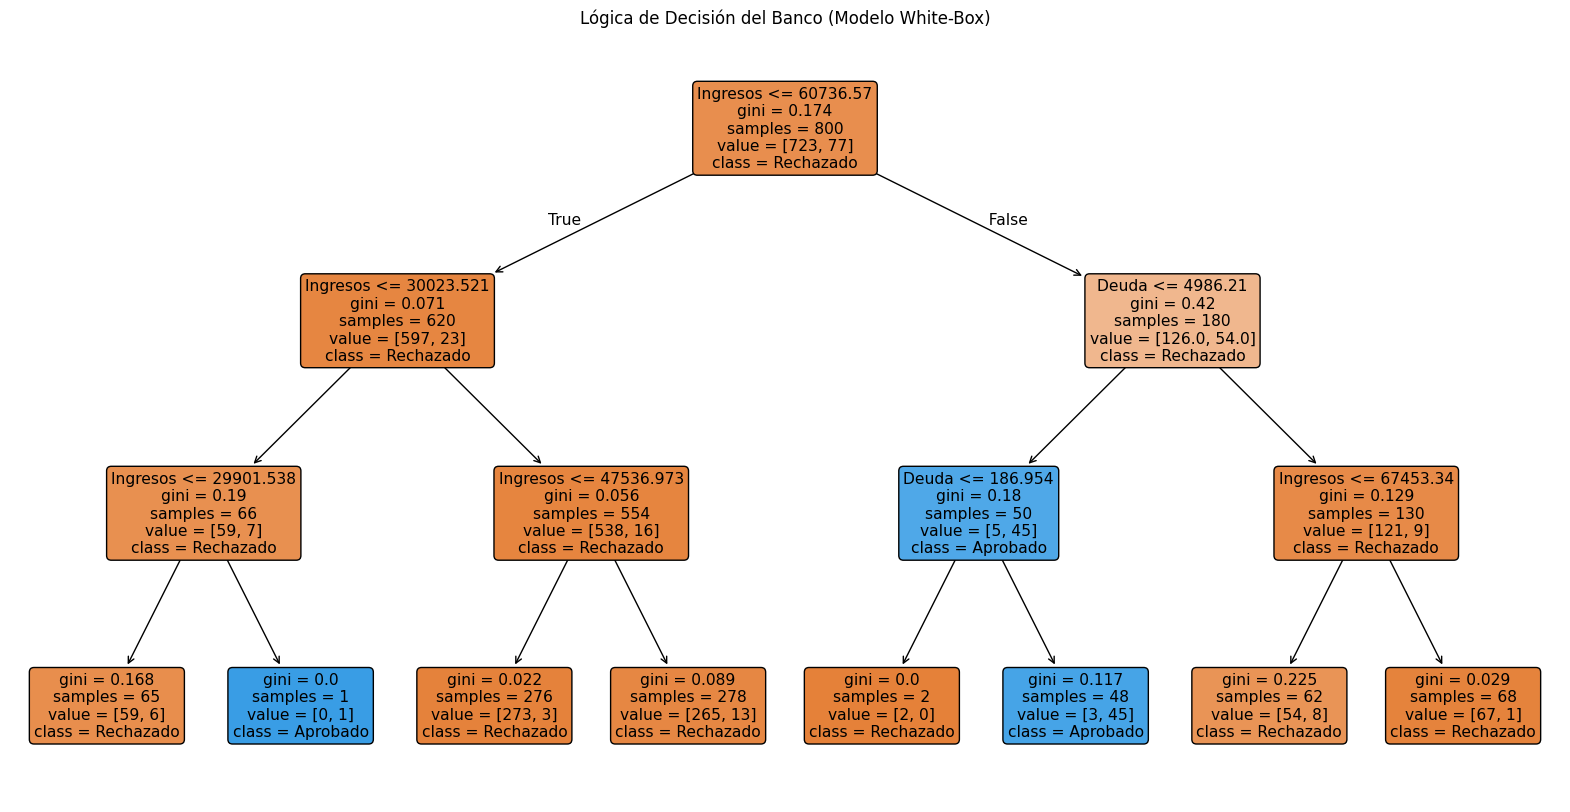


¿Qué variable importa más para dar un crédito?
Ingresos    0.410777
Deuda       0.400419
Score       0.188804
dtype: float64


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree #El arbol
from sklearn.ensemble import RandomForestClassifier #El bosque
from sklearn.metrics import accuracy_score

# 1. GENERAR DATOS FINANCIEROS (Simulación FinTech)
np.random.seed(42)
n_clientes = 1000

# Variables: Ingresos anuales, Puntuacion de credito (300-850), Deuda actual
ingresos = np.random.normal(50000, 15000, n_clientes)
score_credito = np.random.randint(300, 500, n_clientes)
deuda = np.random.uniform(0, 20000, n_clientes)

# DataFrame
df = pd.DataFrame({
    'Ingresos': ingresos,
    'Score': score_credito,
    'Deuda': deuda
})

# Logica del banco (Ground Truth): Aprueba si: (Score > 700) o (Ingresos > 60k y Deuda < 5k)
# Es logica "no lineal". Dificil para una regresion simple.
condicion = (df['Score'] > 700) | ((df['Ingresos'] > 60000) & (df['Deuda'] < 5000))
df['Aprobado'] = condicion.astype(int)

# Añadimos un poco de ruido (errores humanos del pasado)
indices_ruido = np.random.choice(df.index, size=50, replace=False)
df.loc[indices_ruido, 'Aprobado'] = 1 - df.loc[indices_ruido, 'Aprobado']

# 2. PREPARAR DATOS
X = df[['Score', 'Ingresos', 'Deuda']]
y = df['Aprobado']
X_trin, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. EL DUELO: ARBOL SOLITARIO vs BOSQUE (RANDOM FOREST)

# Modelo A: Un solo arbol de decision
# Uso max_depth=3 para que el grafico se vea bonito y no sea un monstruo gigante
arbol = DecisionTreeClassifier(max_depth=3, random_state=42)
arbol.fit(X_trin, y_train)

# Modelo B: random forest (100 arboles votando juntos)
bosque = RandomForestClassifier(n_estimators=100, random_state=42)
bosque.fit(X_trin, y_train)

# 4. RESULTADOS
pred_arbol = arbol.predict(X_test)
pred_bosque = bosque.predict(X_test)

print(f"Precision Arbol Unico: {accuracy_score(y_test, pred_arbol):.2f}")
print(f"Precision Random Forest: {accuracy_score(y_test, pred_bosque):.2f}")

# 5. VISUALIZACION
plt.figure(figsize=(20, 10))
plot_tree(arbol, filled=True, feature_names=X.columns, class_names=['Rechazado', 'Aprobado'], rounded=True)
plt.title('Lógica de Decisión del Banco (Modelo White-Box)')
plt.show()

importancia = pd.Series(bosque.feature_importances_, index=X.columns)
print("\n¿Qué variable importa más para dar un crédito?")
print(importancia.sort_values(ascending=False))
